In [1]:
import math
import sympy
sympy.init_printing()

import IPython.display

def p(* s_lst) :
    IPython.display.display(IPython.display.Math( ', '.join( sympy.latex(i) for i in s_lst ) ))

import trajbang.trajbang3.full as tb3

Ag, Sg, Jm, Am, Aw = sympy.symbols('A_g S_g J_m A_m A_w')

## in one step

In [89]:
T, J, A, S = tb3.TrajBang3.equation(1)
u = tb3.TrajBang3(1, 2, -1.0, 0.0, 1.0, 0.0)

In [90]:
T0, = T
J0, = J
A0, A1 = A
S0, S1 = S
T0

In [116]:
sg_equ = S1.subs({'J_0': Aw * Jm, 'T_0': Aw * (Ag - A0)/Jm}).expand()
sg_equ

In [123]:
u = tb3.TrajBang3(1, 2, -1.0, 1.0, 1.0, 1.0)
sg_equ.subs(u.val).subs({'A_w': 1})

In [112]:
u = tb3.TrajBang3(1, 2, 1.0, 1.0, -1.0, 1.0)
sg_equ.subs(u.val).subs({'A_w': -1})

In [113]:
t0_res = sympy.solve(sympy.Eq(j0a, j0s), 'T_0')
t0 = t0_res[0]

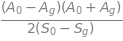

In [9]:
j0a.subs({'T_0': t0}).simplify()

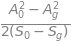

In [10]:
j0s.subs({'T_0': t0}).simplify()

## in two steps

In [2]:
T, J, A, S = tb3.TrajBang3.equation(2)

In [3]:
a0, a1, a2 = A

In [4]:
s0, s1, s2 = S

In [5]:
u = tb3.TrajBang3(1.3, 3.0, -0.6, 2.8, -2.4, 1.3)
u.compute()

(None, None, None)

In [7]:
s = list()
for j0, j1 in  [[Jm, 0], [-Jm, 0], [Jm, -Jm], [-Jm, Jm], [0, Jm], [0, -Jm]] :
    s2_sub = s2.subs({'J_0': j0, 'J_1': j1})
    a2_sub = a2.subs({'J_0': j0, 'J_1': j1})
    t0, t1 = (i.simplify() for i in sympy.solve([sympy.Eq(a2_sub, Ag), sympy.Eq(s2_sub, Sg)], ['T_0', 'T_1'])[0])
    p(j0, j1, t0, t0.subs(u.val), t1, t1.subs(u.val))
    s.append([t0, t1])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
jm, am, a0, s0, ag, sg = u.jm, u.am, u.a0, u.s0, u.ag, u.sg


In [34]:
( -a0 - math.sqrt(2*a0**2 + 2*ag**2 - 4*jm*s0 + 4*jm*sg)/2 ) / jm

In [42]:
-( a0 + math.sqrt( (a0**2+ag**2)/2 + jm*(sg + s0)) ) / jm

In [16]:
print(s[0][0][0], s[0][0][1])

IndexError: list index out of range

In [ ]:
(s[1][0][0], s[1][0][1])

In [ ]:
(s[2][0][0].simplify(), s[2][0][1].simplify())

In [ ]:
(s[3][0][0].simplify(), s[3][0][1].simplify())

In [ ]:
(s[4][0][0].simplify(), s[4][0][1].simplify())

In [ ]:
(s[5][0][0].simplify(), s[5][0][1].simplify())

In [ ]:
s[0]

In [ ]:
val = u.val
aw = 1 if 0 <= ag.subs(val) - a0.subs(val) else -1
sw = 1 if 0 <= sg.subs(val) - s0.subs(val) else -1
m = aw * (ag**2 - a0**2) + 2*Jm * (sg - s0)
m, m.subs(val)

## in Three steps

In [127]:
T, J, A, S = tb3.TrajBang3.equation(3)

In [128]:
T0, T1, T2 = T
J0, J1, J2 = J
A0, A1, A2, A3 = A
S0, S1, S2, S3 = S

In [129]:
Sw = sympy.sign(Am - A0)
t0 = (Am - A0) / Jm

In [130]:
S1

In [133]:
(S3 - S2).expand()

In [134]:
S2 - S1